Kernel: We need to use the Python 3.9.7 from the Anaconda distribution.

#  **1. Import libraries**

First, we need to import some libraries for data processing.

In [293]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,7) # Long plot

* `pandas:` offers data structures and operations to manipulate numerical tables and time series.
* `numpy:` offers a giant collection of high-level mathematical functions to operate on arrays and matrices.
* `matplotlib:` offers an interactive visualization lile plotting graphs.

# **2. Data Collection**

## ***2.1 Get raw data***

Our data is stored in a CSV files.

In [294]:
data_dirs_list = ['../Data/FIE00144982.csv', '../Data/GM000004204.csv', '../Data/NLM00006235.csv', '../Data/SWE00139148.csv', '../Data/USW00094728.csv']
dfs = []
for data_dir in data_dirs_list:
    dfs.append(pd.read_csv(data_dir))

print(dfs)

[        STATION  DATE  LATITUDE  LONGITUDE  ELEVATION                NAME  \
0   FIE00144982  1970   63.3206    30.0492       98.0  LIEKSA LAMPELA, FI   
1   FIE00144982  1971   63.3206    30.0492       98.0  LIEKSA LAMPELA, FI   
2   FIE00144982  1972   63.3206    30.0492       98.0  LIEKSA LAMPELA, FI   
3   FIE00144982  1973   63.3206    30.0492       98.0  LIEKSA LAMPELA, FI   
4   FIE00144982  1974   63.3206    30.0492       98.0  LIEKSA LAMPELA, FI   
5   FIE00144982  1975   63.3206    30.0492       98.0  LIEKSA LAMPELA, FI   
6   FIE00144982  1976   63.3206    30.0492       98.0  LIEKSA LAMPELA, FI   
7   FIE00144982  1977   63.3206    30.0492       98.0  LIEKSA LAMPELA, FI   
8   FIE00144982  1978   63.3206    30.0492       98.0  LIEKSA LAMPELA, FI   
9   FIE00144982  1979   63.3206    30.0492       98.0  LIEKSA LAMPELA, FI   
10  FIE00144982  1980   63.3206    30.0492       98.0  LIEKSA LAMPELA, FI   
11  FIE00144982  1981   63.3206    30.0492       98.0  LIEKSA LAMPELA, FI  

Then, we will get the average temperatures data from the CSV files.

In [295]:
temperatures = []
for df in dfs:
    temperatures.append(df[['DATE', 'TAVG']])

for i  in range(len(temperatures)):
    print("Station: ", data_dirs_list[i])
    print(temperatures[i])

Station:  ../Data/FIE00144982.csv
    DATE  TAVG
0   1970   NaN
1   1971  0.97
2   1972  3.09
3   1973  1.63
4   1974  3.69
5   1975  3.55
6   1976  0.26
7   1977  1.93
8   1978  0.14
9   1979  1.86
10  1980  0.98
11  1981  2.02
12  1982  2.25
13  1983  2.53
14  1984  3.08
15  1985 -0.05
16  1986  1.64
17  1987 -0.27
18  1988  2.05
19  1989  4.14
20  1990  2.72
21  1991  2.43
22  1992  2.52
23  1993  1.47
24  1994  1.61
25  1995  2.87
26  1996  1.92
27  1997  1.92
28  1998  1.45
29  1999  2.61
30  2000  3.98
31  2001  2.13
32  2002  2.05
33  2003  2.67
34  2004  2.52
35  2005  3.44
36  2006  2.73
37  2007  3.33
38  2008  3.66
39  2010  1.23
40  2011  3.57
41  2012  2.03
42  2013  3.72
43  2014  4.03
44  2015  4.41
45  2016  3.63
46  2017  3.10
47  2018  3.48
48  2019  3.11
49  2020  4.90
50  2021  2.66
Station:  ../Data/GM000004204.csv
     DATE   TAVG
0    1824   8.52
1    1825   9.34
2    1826   9.21
3    1827   8.75
4    1828   9.50
..    ...    ...
188  2017  11.08
189  2018  11.66

Now, let's find if there is some missing cells in the data.

In [296]:
processing_starting_year = 1991
processing_ending_year = 2020
years_list = [x for x in range(processing_starting_year, processing_ending_year + 1)]

def find_if_missing(temp):  # temp = temperature
    
    years = []

    for i in range(len(temp)):
        years.append(int(temp.iloc[i]['DATE']))

    starting_position = years.index(processing_starting_year)
    ending_position = years.index(processing_ending_year)

    missing_years = []
    available_years = []

    for i in range(starting_position, ending_position + 1, 1):
        if np.isnan(temp.iloc[i]['TAVG']):
            missing_years.append(years[i])
        else:
            available_years.append(years[i])

    not_available_years = list(set(years_list) - set(available_years))
    # print(not_available_years)

    answer = missing_years + not_available_years

    return answer
    
    

# print(len(temperatures))
# print(len(data_dirs_list))

for i in range(0, len(temperatures)):
    print("Station: ", data_dirs_list[i])
    
    missing = find_if_missing(temperatures[i])

    if len(missing) == 0:
        print("No missing data")
    else:
        print("Missing data: ", missing)

Station:  ../Data/FIE00144982.csv
Missing data:  [2009]
Station:  ../Data/GM000004204.csv
No missing data
Station:  ../Data/NLM00006235.csv
No missing data
Station:  ../Data/SWE00139148.csv
No missing data
Station:  ../Data/USW00094728.csv
No missing data


Oops, there is a missing cell in data of the first station. Let's fix it.

In [297]:
def fill_missing_data(temp):
    years = []

    for i in range(len(temp)):
        years.append(int(temp.iloc[i]['DATE']))

    starting_position = years.index(processing_starting_year)
    ending_position = years.index(processing_ending_year)

    years_data = years[starting_position:ending_position + 1]

    missing_years = find_if_missing(temp)
    
    if len(missing_years) > 0:
        for year in missing_years:  # there is only one missing cell
            # print("Year: ", year)
            before_position = years.index(year - 1)
            after_position = years.index(year + 1)
            # print("Before: ", years[before_position])
            # print("After: ", years[after_position])

            before_value = temp.iloc[before_position]['TAVG']
            after_value = temp.iloc[after_position]['TAVG']
            # print("Before value:" , before_value)
            # print("After value: ", after_value)
            new_value = round((before_value + after_value) / 2, 2)
            # print("New value: ", new_value)

            
            temperatures_data = []
            for i in range(starting_position, before_position + 1, 1):
                temperatures_data.append(temp.iloc[i]['TAVG'])
            temperatures_data.append(new_value)
            for i in range(after_position, ending_position + 1, 1):
                temperatures_data.append(temp.iloc[i]['TAVG'])

            return temperatures_data

Now, data will be written to csv files for later use.

In [298]:
def write_data_to_csv_files(temp, file_name):  # temp = temperature
    years = []

    for i in range(len(temp)):
        years.append(int(temp.iloc[i]['DATE']))

    starting_position = years.index(processing_starting_year)
    ending_position = years.index(processing_ending_year)

    years_data = []
    for i in range(processing_starting_year, processing_ending_year + 1, 1):
        years_data.append(i)
    # print(years_data)

    temperatures_data = []

    missing_years = find_if_missing(temp)
    if len(missing_years) > 0:
        temperatures_data =  fill_missing_data(temp)
    else:
        for i in range(starting_position, ending_position + 1, 1):
            temperatures_data.append(temp.iloc[i]['TAVG'])

    data = {'Year': years_data, 'Temperature': temperatures_data}
    df = pd.DataFrame(data)
    df.to_csv(file_name, index = False)

    # print(temperatures_data)

for i in range(len(temperatures)):
    file_name = "data" + str(i) + ".csv"
    write_data_to_csv_files(temperatures[i], file_name)


Now, we will visualize data by scatter graphs.

In [299]:
def visualize_data(file_name):
    df = pd.read_csv(file_name)
    years_data = df.loc[:, "Year"].to_numpy()
    # print(years_data)

    temperatures_data = df.loc[:, "Temperature"].to_numpy()
    # print(temperatures_data)

    plt.scatter(years_data, temperatures_data, linewidths=0.6)

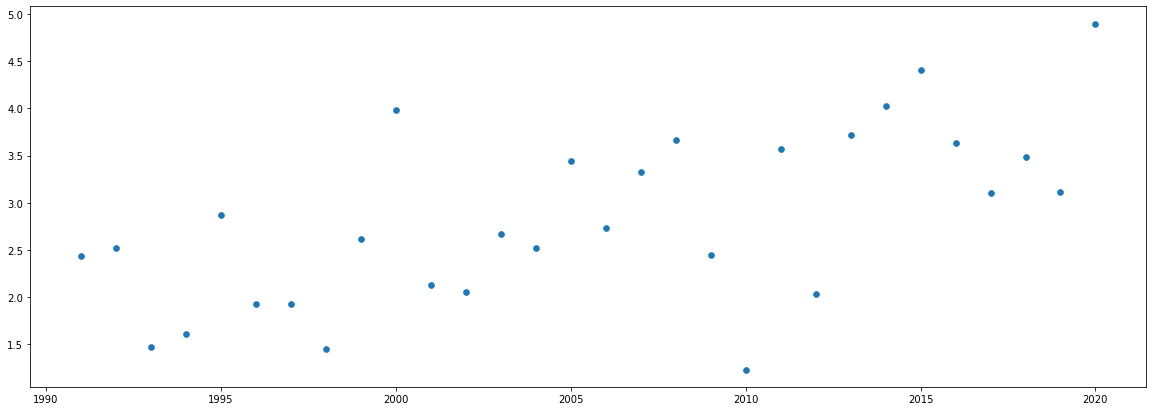

In [300]:
visualize_data("data0.csv")

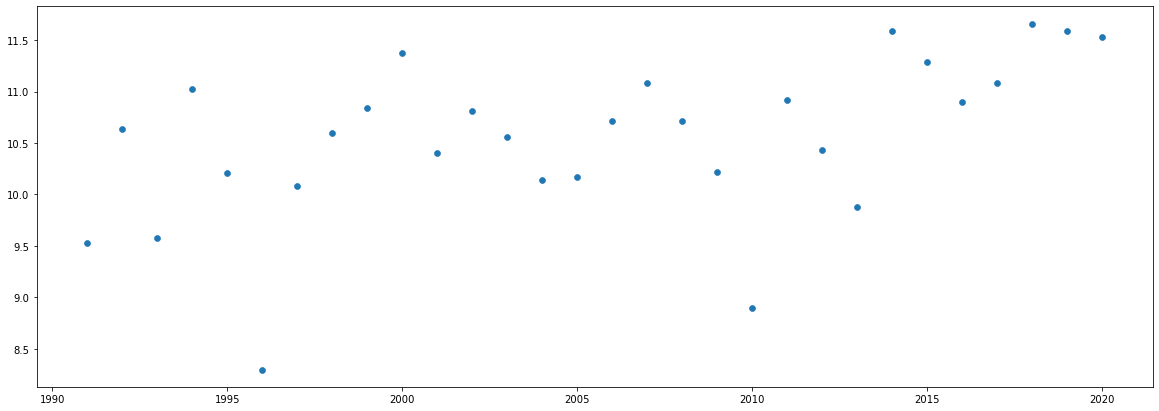

In [301]:
visualize_data("data1.csv")

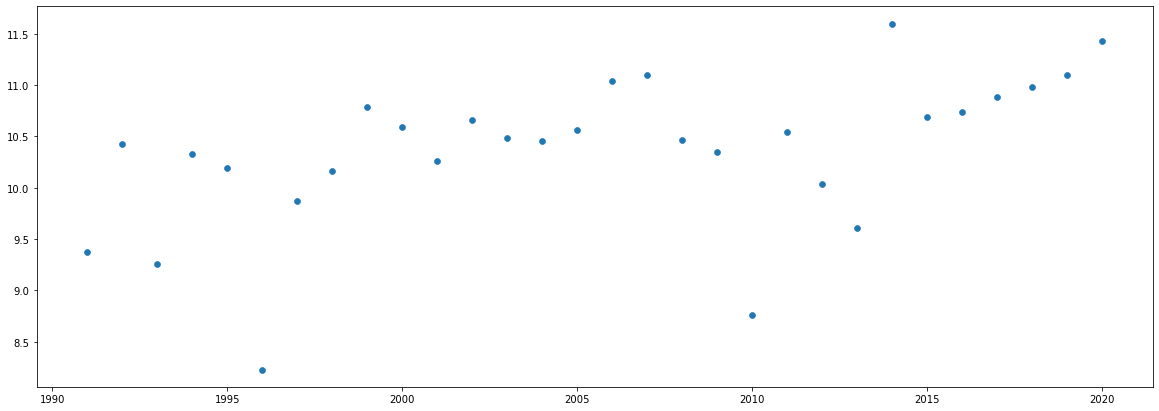

In [302]:
visualize_data("data2.csv")

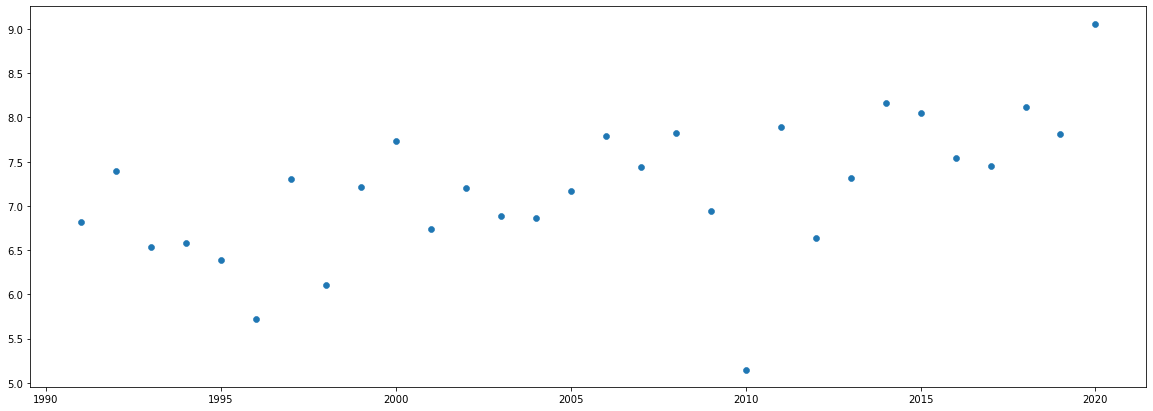

In [303]:
visualize_data("data3.csv")

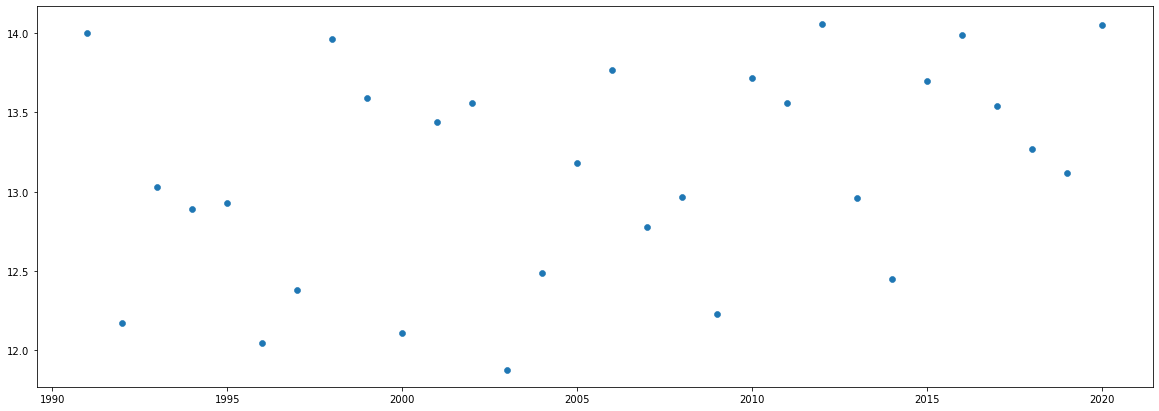

In [304]:
visualize_data("data4.csv")

In [305]:
from sklearn.metrics import r2_score

In [306]:
x = []
for i in range(processing_starting_year, processing_ending_year + 1, 1):
    x.append(i - processing_starting_year + 1)
print(x)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [307]:
def regression(file_name):
    # regression model
    df = pd.read_csv(file_name)

    y = []
    for i in range(len(df)):
        y.append(df.iloc[i]['Temperature'])
    
    plt.scatter(x, y, linewidths=0.6)
    
    model = np.poly1d(np.polyfit(x, y, 4))

    line_format = np.linspace(1, 40, 100)

    plt.scatter(x, y)
    plt.plot(line_format, model(line_format))
    plt.show()
    
    # find regression coefficients
    y_array = []
    for i in range(len(y)):
        element = []
        element.append(y[i])
        y_array.append(element)
    
    y_matrix = np.matrix(y_array)

    a_list = []
    for i in range(len(x)):
        elements = []

        for j in range(4, -1, -1):
            elements.append(x[i] ** j)
        
        a_list.append(elements)
    
    a_matrix = np.matrix(a_list)
    

    temp1 = a_matrix.transpose() * a_matrix
    temp1 = np.linalg.inv(temp1)
    temp2 = temp1 * a_matrix.transpose()

    theta_matrix = temp2 * y_matrix
    
    print("Regression polynomial: ")
    for i in range(0, 5, 1):
        print(theta_matrix.item(i), end = "")
        print( "x^", end = "")
        print(4 - i, end="")
        if (i < 4):
            print(" + ", end = "")
    
    print("")

    # find r-square
    print("R-squared value: ", r2_score(y, model(x)))

   


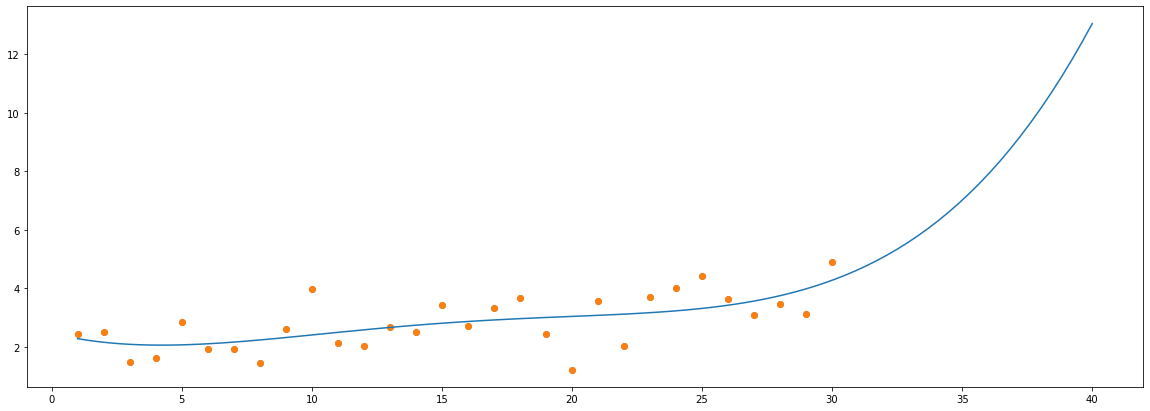

Regression polynomial: 
-5.440696588393936e-08x^4 + -1.4193661010427498e-06x^3 + -3.390187408964452e-05x^2 + 0.06906697211956156x^1 + 1.7922748300933473x^0
R-squared value:  0.41135774639672984


In [308]:
regression("data0.csv") 

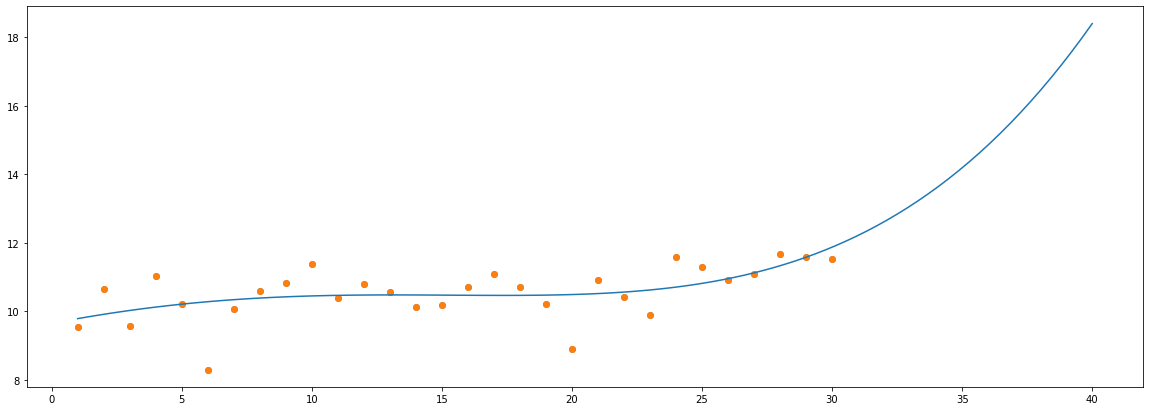

Regression polynomial: 
-5.700798658750153e-08x^4 + -2.0599835597330993e-06x^3 + -5.6062679481117645e-05x^2 + 0.049185535684720484x^1 + 9.83816261835397x^0
R-squared value:  0.3252790213127038


In [309]:
regression("data1.csv") 

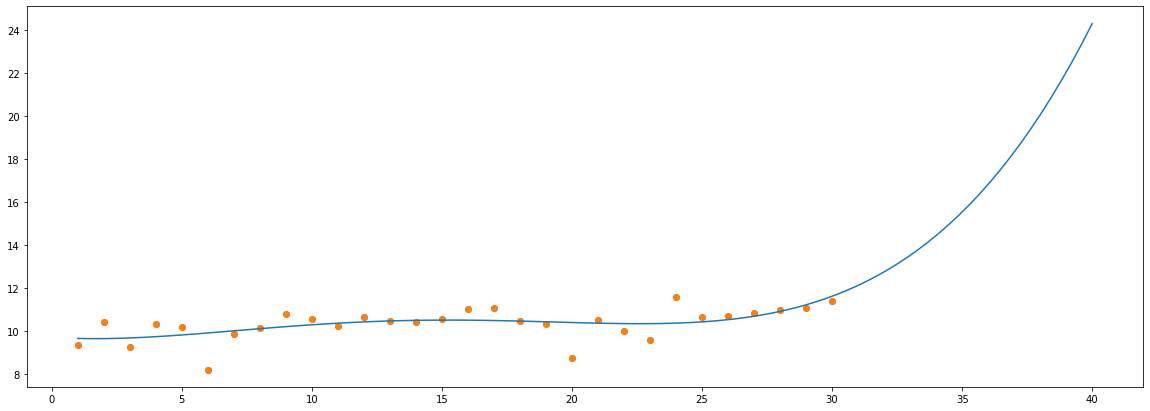

Regression polynomial: 
1.2330403458287108e-10x^4 + -6.025722086308692e-07x^3 + -2.7827060612108855e-05x^2 + 0.043479773715056236x^1 + 9.705155031703459x^0
R-squared value:  0.3426706777630888


In [310]:
regression("data2.csv") 

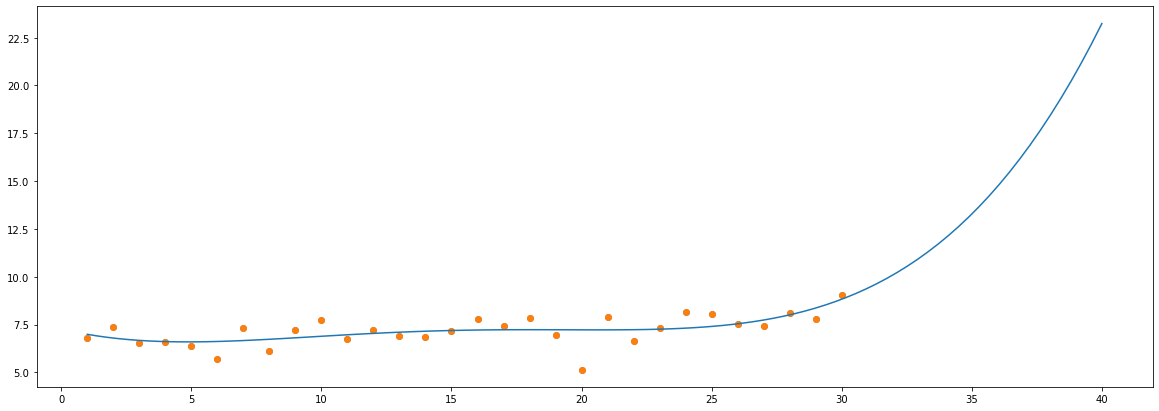

Regression polynomial: 
-8.846360789657505e-08x^4 + -2.5081075586074237e-06x^3 + -6.295659694026284e-05x^2 + 0.05562606761739193x^1 + 6.385266857282264x^0
R-squared value:  0.41389469039592786


In [311]:
regression("data3.csv") 

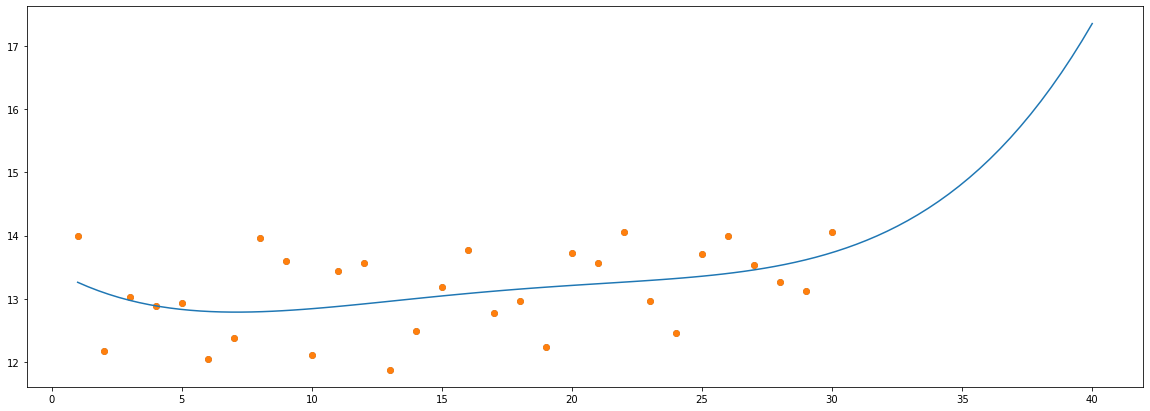

Regression polynomial: 
-6.086130818581686e-08x^4 + -1.304404641842641e-06x^3 + -2.48900394735611e-05x^2 + 0.027780336262272318x^1 + 12.725016877784563x^0
R-squared value:  0.15027619985547735


In [312]:
regression("data4.csv") 